## Neural network from scratch

Neural networks generally have multiple connected layers between their input and output, called “hidden” layers. There are numbers of neurons in each layer, each neuron receive the signals from those from the previous layer and process it to the next layer (Mathematically, the sum of weighted input followed by a activation fuction).

The training process consists of forward pass and back propagation (calculate the gradient of the loss function with respect to the weights by chain rule). This process is to minimize the loss fuction by adjusting the weights of each layer.

Here I separatedly the implement 3-layer neural network classifier and regressor.

In [1]:
## Neural net with 2 hidden layers

import matplotlib.pyplot as plt
import numpy as np

In [2]:
class NeuralNet():
    def __init__(self, learning_rate=0.01, reg_lambda=0.1, nn_hdim=[10,20], num_iter=2000, print_loss=True):
        self.learning_rate = learning_rate
        # learning rate
        self.reg_lambda = reg_lambda
        # regularization coefficient
        self.nn_hdim = nn_hdim
        # number of hidden layers
        self.num_iter = num_iter
        # number of learing steps
        self.print_loss = print_loss
        # print the loss
        
    def _forward_prop(self, weights, X):
        W1, W2, W3 = weights['W1'], weights['W2'], weights['W3']
        b1, b2, b3 = weights['b1'], weights['b2'], weights['b3']
        a1 = np.tanh(X.dot(W1) + b1)
        a2 = np.tanh(a1.dot(W2) + b2)
        z3 = a2.dot(W3) + b3
        exp_scores = np.exp(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return probs, (a1, a2)
        
    def _calculate_loss(self, weights, X, y):
        probs = self._forward_prop(weights, X)[0]
        corect_logprobs = -np.log(probs[range(self.num_examples), y])
        data_loss = np.sum(corect_logprobs)
        data_loss += self.reg_lambda/2 * (np.sum(np.square(weights['W1'])) \
                                          + np.sum(np.square(weights['W2'])) \
                                          + np.sum(np.square(weights['W3'])))
        return 1./self.num_examples * data_loss

    def fit(self, X, y):
        nn_hdim = self.nn_hdim
        reg_lambda = self.reg_lambda
        epsilon = self.learning_rate
        nn_input_dim = X.shape[1]
        nn_output_dim = len(np.unique(y))
        self.num_examples = len(X)
        
        np.random.seed(0)
        W1 = np.random.randn(nn_input_dim, nn_hdim[0]) / np.sqrt(nn_input_dim)
        b1 = np.zeros((1, nn_hdim[0]))
        W2 = np.random.randn(nn_hdim[0], nn_hdim[1]) / np.sqrt(nn_hdim[0])
        b2 = np.zeros((1, nn_hdim[1]))
        W3 = np.random.randn(nn_hdim[1], nn_output_dim) / np.sqrt(nn_hdim[1])
        b3 = np.zeros((1, nn_output_dim))
        
        weights = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
        
        for i in range(0, self.num_iter):

        ## Forward propagation
            probs = self._forward_prop(weights, X)[0]
            a1, a2 = self._forward_prop(weights, X)[1]
            
        ## Backpropagation
            delta = np.copy(probs)  
            delta[range(self.num_examples), y] -= 1
            dW3 = (a2.T).dot(delta)
            db3 = np.sum(delta, axis=0, keepdims=True)
            delta3 = delta.dot(W3.T) * (1 - np.power(a2, 2))
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0, keepdims=True)

        ## Add regularization terms 
            dW1 += reg_lambda * W1
            dW2 += reg_lambda * W2
            dW3 += reg_lambda * W3

        ## Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
            W3 += -epsilon * dW3
            b3 += -epsilon * db3
        
        ## Assign new parameters to the weights
            weights = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
        
        ## print the loss.
            if self.print_loss and i % 100 == 0:
                print("Loss after iteration %i: %f" %(i, self._calculate_loss(weights, X, y)))  

        self.weights = weights 
        
    def predict(self, X):
        weights = self.weights
        probs = self._forward_prop(weights, X)[0]
        return np.argmax(probs, axis=1)
    

Loss after iteration 0: 0.451773
Loss after iteration 100: 0.155606
Loss after iteration 200: 0.122906
Loss after iteration 300: 0.115579
Loss after iteration 400: 0.111496
Loss after iteration 500: 0.108548
Loss after iteration 600: 0.106274
Loss after iteration 700: 0.104479
Loss after iteration 800: 0.103033
Loss after iteration 900: 0.101840
Loss after iteration 1000: 0.100830
Loss after iteration 1100: 0.099961
Loss after iteration 1200: 0.099205
Loss after iteration 1300: 0.098549
Loss after iteration 1400: 0.097973
Loss after iteration 1500: 0.097452
Loss after iteration 1600: 0.096968
Loss after iteration 1700: 0.096508
Loss after iteration 1800: 0.096069
Loss after iteration 1900: 0.095648


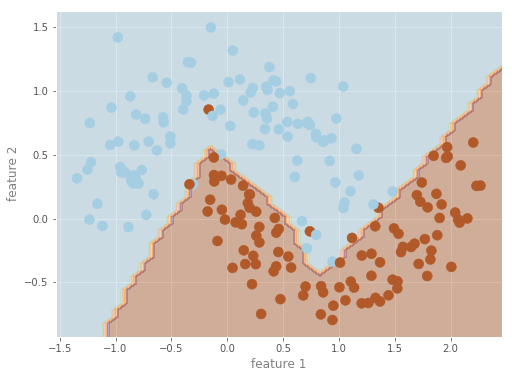

In [3]:
from tools.plot import plot_class
clf = NeuralNet()
plot_class(clf)

In [4]:
class NeuralNetRegression():
    def __init__(self, learning_rate=0.001, reg_lambda=0.01, nn_hdim=[10,20], num_iter=1000, print_loss=True):
        self.learning_rate = learning_rate
        self.reg_lambda = reg_lambda
        self.nn_hdim = nn_hdim
        self.num_iter = num_iter
        self.print_loss = print_loss
        
    def _forward_prop(self, weights, X):
        W1, W2, W3 = weights['W1'], weights['W2'], weights['W3']
        b1, b2, b3 = weights['b1'], weights['b2'], weights['b3']
        a1 = np.tanh(X.dot(W1) + b1)
        a2 = np.tanh(a1.dot(W2) + b2)
        y_pred = a2.dot(W3) + b3
        return y_pred, (a1,a2)
        
    def _calculate_loss(self, weights, X, y):
        y_pred = self._forward_prop(weights, X)[0]
        data_loss = np.average((y - y_pred)**2)
        data_loss += self.reg_lambda/2 * (np.sum(np.square(weights['W1'])) \
                                          + np.sum(np.square(weights['W2'])) \
                                          + np.sum(np.square(weights['W3'])))
        return data_loss


    def fit(self, X, y):
        nn_hdim = self.nn_hdim
        reg_lambda = self.reg_lambda
        epsilon = self.learning_rate
        nn_input_dim = X.shape[1]
        nn_output_dim = 1
        self.num_examples = len(X)
        
        np.random.seed(0)
        W1 = np.random.randn(nn_input_dim, nn_hdim[0]) / np.sqrt(nn_input_dim)
        b1 = np.zeros((1, nn_hdim[0]))
        W2 = np.random.randn(nn_hdim[0], nn_hdim[1]) / np.sqrt(nn_hdim[0])
        b2 = np.zeros((1, nn_hdim[1]))
        W3 = np.random.randn(nn_hdim[1], nn_output_dim) / np.sqrt(nn_hdim[1])
        b3 = np.zeros((1, nn_output_dim))
        
        weights = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
        
        for i in range(0, self.num_iter):

        # Forward propagation
            y_pred = self._forward_prop(weights, X)[0]
            a1,a2 = self._forward_prop(weights, X)[1]
            
        # Backpropagation
            delta = y_pred - y
            dW3 = (a2.T).dot(delta)
            db3 = np.sum(delta, axis=0, keepdims=True)
            delta3 = delta.dot(W3.T) * (1 - np.power(a2, 2))
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = (X.T).dot(delta2)
            db1 = np.sum(delta2, axis=0, keepdims=True)

        # Add regularization terms 
            dW1 += reg_lambda * W1
            dW2 += reg_lambda * W2
            dW3 += reg_lambda * W3

        # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
            W3 += -epsilon * dW3
            b3 += -epsilon * db3
        
        # Assign new parameters to the weights
            weights = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
        
        # print the loss.
            if self.print_loss and i % 200 == 0:
                print("Loss after iteration %i: %f" %(i, self._calculate_loss(weights, X, y)))  
        self.weights = weights 

    def predict(self, X):
        weights = self.weights
        probs = self._forward_prop(weights, X)[0]
        return probs

In [5]:
import random

X = np.array([[i*1.0/100 for i in range(100)]]).T.astype(np.float32)
y = np.array([[i**2/10000 + random.uniform(0, 1)*0.1 for i in range(100)]]).T.astype(np.float32)
XX = np.array([[(i+0.5)/100 for i in range(100)]]).T.astype(np.float32)

reg = NeuralNetRegression()
reg.fit(X, y)

Loss after iteration 0: 0.276410
Loss after iteration 200: 0.187218
Loss after iteration 400: 0.183463
Loss after iteration 600: 0.182174
Loss after iteration 800: 0.181558


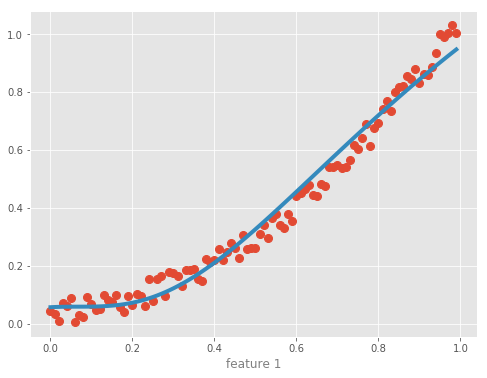

In [6]:
y_pred = reg.predict(XX)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('feature 1', color='gray')
ax.plot(X, y, 'o', markersize=8, label="y_train")
ax.plot(X, y_pred, lw=4, label="y_pred")
plt.show()